<a href="https://colab.research.google.com/github/leesihwan21/AI_26/blob/main/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.

# 럭키백에는 생선이 들어 있는데 종류가 7가지로 랜덤하게 들어 있다.
# 럭키백에 확률을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함

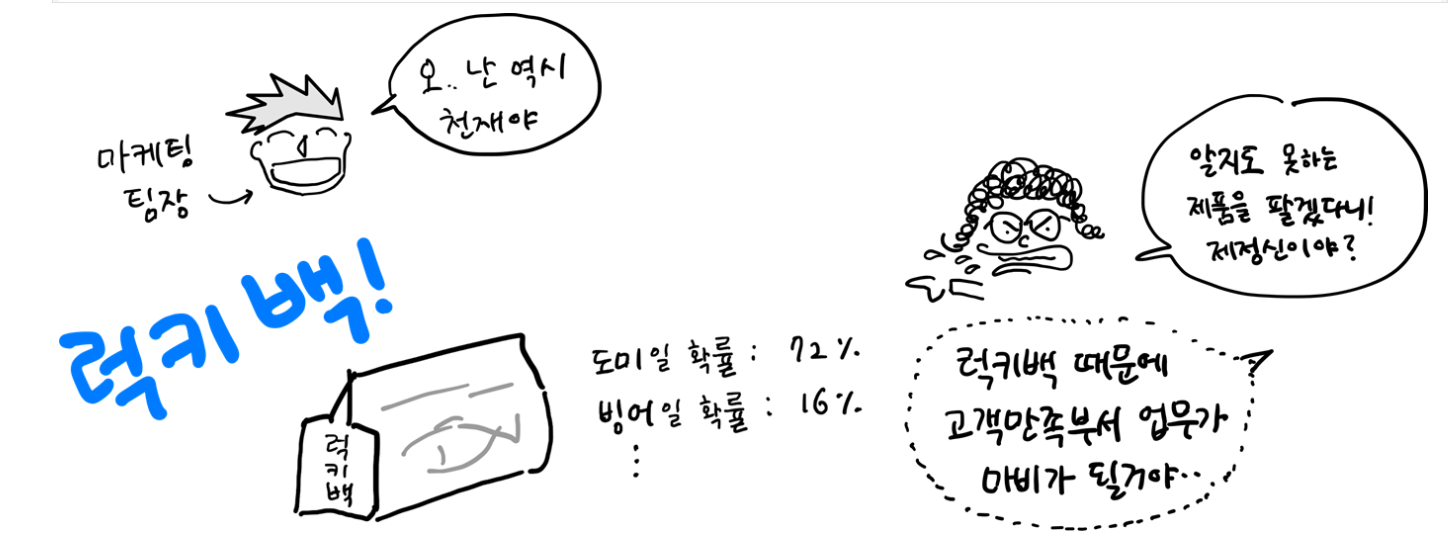

In [ ]:
# 럭키백의 확률 : 생선이 7마리라고 가정한다.
# 생선의 크기, 길이, 높이, 무게, 두께, 대각선의 길이

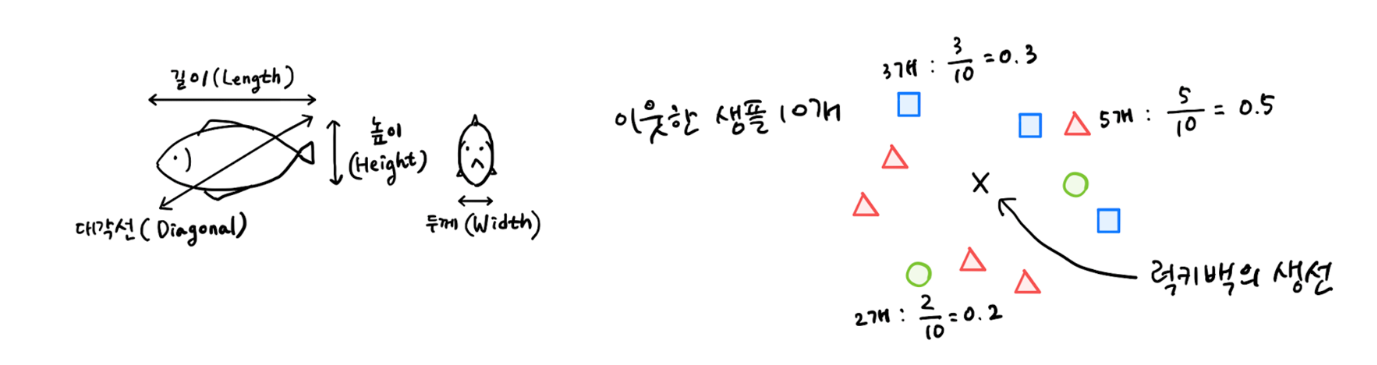

In [2]:
# k-최근접 알고리즘을 이용해보면 회귀? 분류?
# 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자!

# 샘플 10개 중에 농어가 3개면 ? 3 / 10 = 0.3
# 빙어가 5개면 ? 5 / 10 = 0.5
# 도미가 2개면 ? 2 / 10 = 0.2 = 100%

# 사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산도 해줌.

# 샘플데이터 준비
# 로지스틱 회귀 : 럭키백 확률
import pandas as pd # 판다스로 csv를 처리함.

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일을 가져옴
fish.head() # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈). 무게. 길이. 대각선. 키. 너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))     # 유니크하게 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


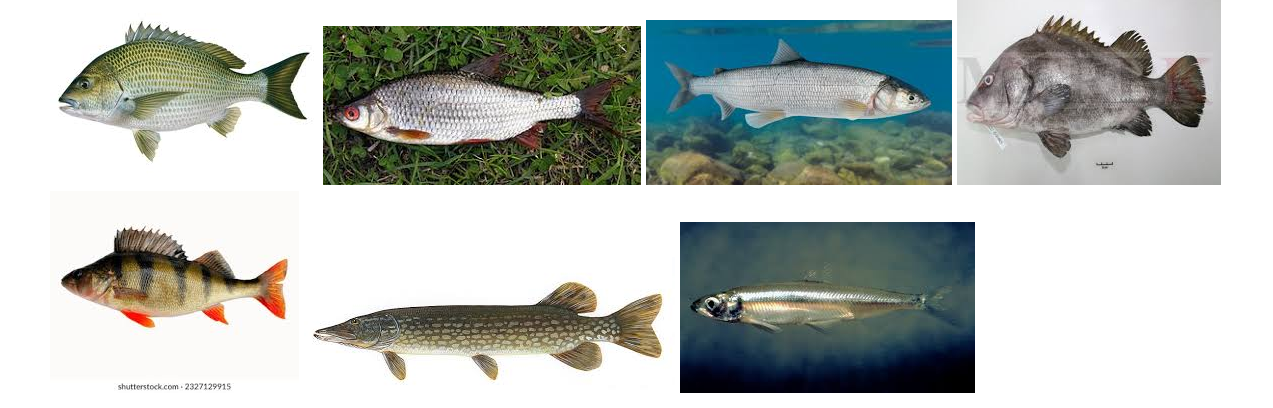

In [4]:
# Bream : 브림(도미)
# Roach : 로치(유럽 잉어과 민물고기)
# Whitefish : 흰살송어(화이트피시)
# Parkki : 파르키 (핀란드산 붕어과 어종)
# Perch : 농어 (정확히는 유럽농어, 퍼치)
# Pike : 강꼬치고기(파이크)
# Smelt : 빙어
# 7개의 종류의 어종이 분포되어 있음

In [6]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])       # 앞에서부터 5개만 출력한다

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish[['Species']] 이렇게 하면 2차원 배열됨(금지) -> 정답파일은 1차원으로
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


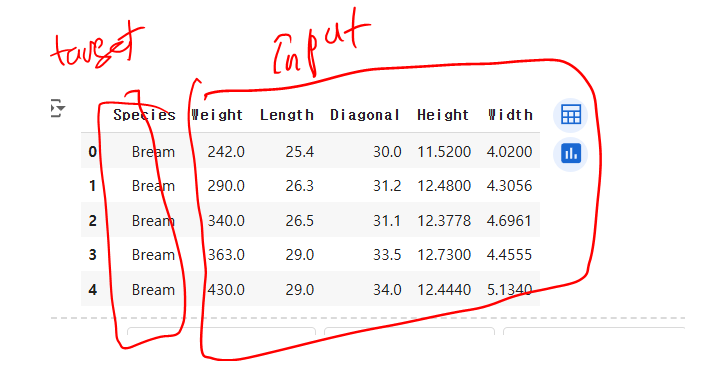

In [8]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split
# train_test_split은 단순히 데이터를 나누는 것을 넘어, 모델이 "본 적 없는 데이터"에 대해 얼마나 잘 작동하는지(일반화 성능)를 확인하기 위한 가장 중요한 과정.

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
# fish_input ['Weight','Length','Diagonal','Height','Width'] 2차원배열
# fish_target ['Species'] 1차원배열

print(train_input.shape, test_input.shape)
# 훈련용 119개의 5개 특성
# 테스트용 40개의 5개 특성

(119, 5) (40, 5)


In [9]:
from sklearn.preprocessing import StandardScaler
# 표준점수는 데이터의 범위(스케일조정) = (값 - 평균) / 표준편차 -> 기본공식
ss = StandardScaler() # 싸이킷런의 전처리용 (스케일조정 : 표준점수)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [10]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier # 이진 분류용

kn = KNeighborsClassifier(n_neighbors=3)          # 이웃 3개를 참고한다.
kn.fit(train_scaled, train_target)                # 훈련시작

print(kn.score(train_scaled, train_target))       # 훈련점수 89.07%
print(kn.score(test_scaled, test_target))         # 테스트 점수 85.00%

0.8907563025210085
0.85


In [11]:
# 전에는 0와 1을 찾는 이진분류 였지만 지금 타겟에 7개의 어종을 넣었음
print(kn.classes_)
# 7개의 생선 종류가 들어있다.
# 2개 이상 클래스가 포함된 문제를 다중 분류라고 함.
# 주의사항 : 클래스의 순서가 인덱스로 되어 있으며, 이것이 오름차순 형태로 보임

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))      # 0 ~ 4 번 인덱스까지 보유.
# 처음 5개 샘플을 타깃값 예측 해보면 아래와 같다.

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
print(test_scaled[:5])      # 전처리 과정에서 표준점수로 변환되어서 보임.

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [14]:
import numpy as np    # 특성에 대한 확률을 보기 위해서 변환

# 사이킷런이 번거로운 연산을 수행해줌으로 쉽게 결과가 나옴
proba = kn.predict_proba(test_scaled[:5])
# 각 클래스에 속할 " 확률(Probability) " 을 반환하는 함수 predict_proba() Probability의 약어.

print(np.round(proba, decimals=4))
# 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch  Pike  Roach  Smelt  Whitefish' 이순서
# [[0.     0.     1.     0.     0.     0.     0.    ]
#  [0.     0.     0.     0.     0.     1.     0.    ]
#  [0.     0.     0.     1.     0.     0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# ['Perch'  100%
#  'Smelt'  100%
#  'Pike'   100%
#  'Perch'  66.66%
#  'Perch'  66.66% ] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.

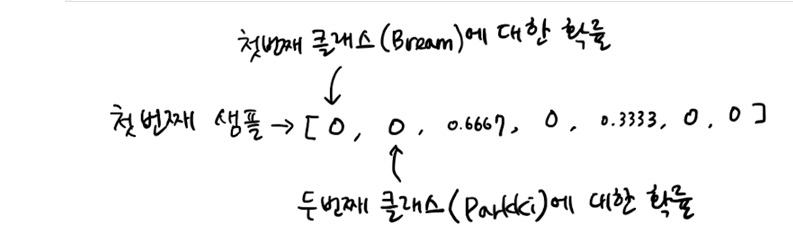

In [16]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4])
                                              # 4번째 값을 자세히 보자
print(train_target[indexes])
#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

# kneighbors는 더미데이터보다 더 높은 값이 들어올때 문제가 생긴다.

[['Roach' 'Perch' 'Perch']]


In [17]:
# 알고리즘 변경 해보자 : 로지스틱 회귀(LogisticRegression)
# 로지스틱 회귀는 사이킷런에서 제공함 from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 이름이 회귀이지만 분류 모델임

# 선형회귀와 동일하게 선형방정식을 학습한다.
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f 는 각 항목에 대한 가중치(중요도, 계수) 임
# z는 어떤 값도 가능함 하지만 확율이 되려면 0~1 (0% ~ 100%) 사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수


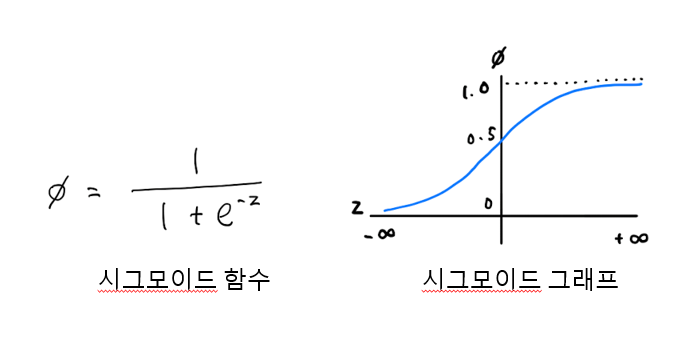

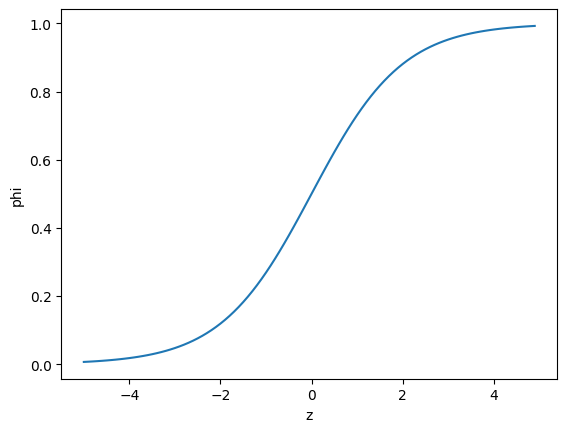

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수 일 경우 0에 가까워짐
# z가 무한하게 큰 양수 일 경우 1에 가까워짐
z = np.arange(-5, 5, 0.1)     # -5~5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z))    # np.exp() 함수로 시그모이드공식 암기

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [19]:
# 선형 방정식의 출력 z의 음수를 사용해 자연 상수 a를 거듭제곱하고 1을 더한 값의 역수를 취함
# 이렇게 하면 0~1사이 값을 0~100% 확률로 해석할 수 있다.

# 훈련 전에 2진분류부터 알아보자.
# 2진 분류인 경우에는 시그모이드 함수 출력이 0.5 보다 크면 양성(Positive), 0.5 보다 작으면 음성으로 판단
# 단, 0.5가 나오면 라이브러리마다 좀 다른데 사이킷런은 음성으로 판단함

In [20]:
# 로지스틱 회귀로 이진 분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달해서 행을 선택할 수 있다. (불리언 인덱싱)
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])  # 불리언 인덱싱
# 결과 : True 값만 출력됨.

['A' 'C']


In [21]:
# 위와 같은 방식으로 훈련 세트에서 도미 (Bream)와, 빙어(Smelt)의 행만 골라보자
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                 Bream(도미) or Smelt(빙어)

# bream_smelt_indexes에 도미와 빙어 일 경우 True 이고, 나머지는 False 가 들어있다.
# 이 배열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.
print(train_bream_smelt)      # 도미이거나 빙어의 특성리스트

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [22]:
print(target_bream_smelt)     # 도미이거나 빙어의 정답 리스트

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [23]:
# 사이킷런에 선형모델에 로지스틱 회귀 클래스를 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()     # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)     # 훈련시작 -> 2진 분류로 나옴

LogisticRegression()

In [24]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자.
print(lr.predict(train_bream_smelt[:5]))      # 도미 4개, 빙어 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [26]:
print(lr.predict_proba(train_bream_smelt[:5]))    # 확률 확인(predict_proba)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [27]:
# 샘플마다 2개의 확률이 출력된다. (시그모이드 함수)
# 첫 번째 열이 0(음성)에 대한 확률, 두 번째 열이 1(양성)에 대한 확률임
# 사이킷런의 타깃 값은 알파벳 순으로 정렬해서 사용함
print(lr.classes_)    # smelt(빙어)가 양성으로 사용됨
# 두 번째 샘플만 양성 클래스인 빙어의 확률이 높다 (나머지는 도미로 예측함)
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면
# 전에 데이터 전처리에서 Bream인 타깃값을 1로 만들어야 함

['Bream' 'Smelt']


In [28]:
# 로지스틱 회귀로 학습한 계수 (중요도 : 가중치) 를 봐보자.
print(lr.coef_, lr.intercept_)
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형 방정식에 대입해서 결과가 나옴
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal)
#     -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [29]:
z = -0.40451732 * (train_bream_smelt[0,0]) + -0.57582787 * (train_bream_smelt[0,1]) \
 + -0.66248158 * (train_bream_smelt[0,2]) + -1.01329614 * (train_bream_smelt[0,3]) \
 + -0.73123131 * (train_bream_smelt[0,4]) + -2.16172774
print(z)

-6.0299135794102545


In [30]:
decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt 의 처음 5개의 z값을 출력해보자.
print(decisions)      # 각 특성을 계산한 z 결과값이 나옴

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [31]:
# 이 z 값을 시그모이드 함수에 통과 시키면 확률을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()
from scipy.special import expit

print(expit(decisions))   # phi = 1 / (1 + np.exp(-z))

# 여기까지가 2개의 물고기 분류하는 방법임
# 도미        빙어       도미       도미       도미
# [0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [32]:
# 다중분류로 진행 해보기 (2진분류는 True 아니면 모두 False 처리 됨)
# 현재 어종이 7개 임으로 로지스틱 회귀로 분류를 학습함

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상
# LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절 하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 규제를 제어하는 매개변수가 C 로 되어있음 -> C가 작으면 규제가 커짐(기본1)
# 규제를 완화하기 위해서 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter=1000)    # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))    # 93.27%
print(lr.score(test_scaled, test_target))      # 92.5% 과소 적합이나 과대 적합이 아닌듯함.

0.9327731092436975
0.925


In [33]:
print(lr.predict(test_scaled[:5]))      # 0~4번 인덱스 결과(분석시 다중 분류로 나옴)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [36]:
proba = lr.predict_proba(test_scaled[:5])
# 각 클래스에 속할 "확률"을 반환하는 함수 predict_proba()
print(np.round(proba, decimals=3))
#  Bream Parkki Perch Pike  Roach Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003] = 1.001
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ] = 1.0
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ] = 0.999
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076] = 0.999
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]] = 0.998

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [37]:
print(lr.classes_)      # 알파벳 순으로 정렬되어 보임
# 7개의 클래스가 명확하게 구분이 됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [38]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) 이 데이터는 5개의 특성을 사용함, 7행을 가짐
# (7,)  7개의 행 -> 이진 분류에서 보았던 z을 7개를 계산함.
# 다중 분류는 클래스마다 z 값을 하나씩 계산 한다는 의미다.
# 당연히 가장 높은  z 값을 출력하는 클래스가 예측 클래스가 됨
# ================= 다중분류 끝 =============================

(7, 5) (7,)


In [39]:
# 그럼 확률은 ? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환 했었다.
# 그러나 다중 분류에서 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum ->  s1 ~ s7 까지 모두 더하면 분모가 같아져 1이 됨


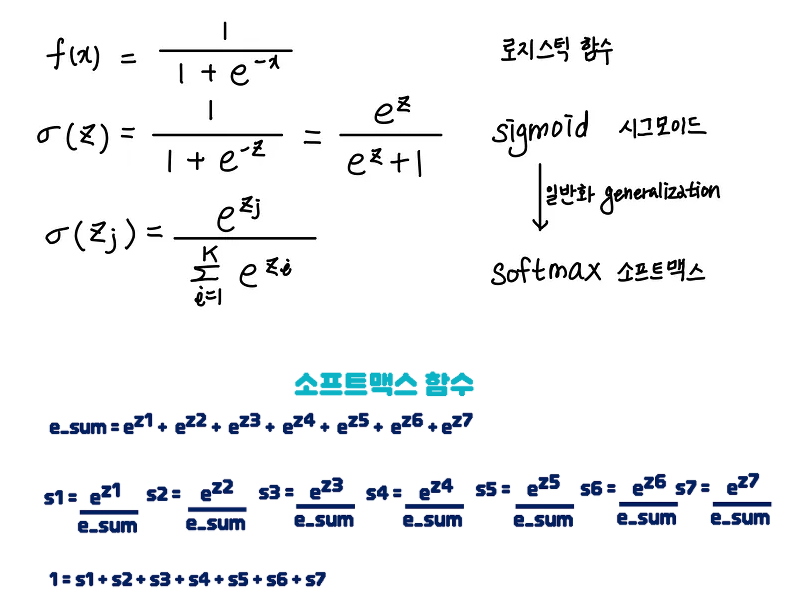

In [40]:
# 0~4번 인덱스의 테스트 리스트에서 결과를 출력함
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1~z7의 값\n")
for idx, z in enumerate(decision):    # 선형방정식을 이용한 7개의 특성의 값
    print(f"{idx}번째 샘플의 z값\n{z}\n")

# 5개 샘플에 대한 z1~z7의 값

# 0번째 샘플의 z값
# [-6.50722813  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625858 -0.62549703]

# 1번째 샘플의 z값
# [-10.87900747 1.9441061   4.77600606 -2.42306183  2.98748716  7.84171376 -4.24724379]

# 2번째 샘플의 z값
# [-4.33809957 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431897 -3.87182372]

# 3번째 샘플의 z값
# [-0.69143993  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143405  1.25700485]

# 4번째 샘플의 z값
# [-6.40138611 -1.99137623  5.81526372 -0.134644    3.49905133 -0.08753486 -0.69937385]

5개 샘플에 대한 z1~z7의 값

0번째 샘플의 z값
[-6.50722813  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625858
 -0.62549703]

1번째 샘플의 z값
[-10.87900747   1.9441061    4.77600606  -2.42306183   2.98748716
   7.84171376  -4.24724379]

2번째 샘플의 z값
[-4.33809957 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431897
 -3.87182372]

3번째 샘플의 z값
[-0.69143993  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143405
  1.25700485]

4번째 샘플의 z값
[-6.40138611 -1.99137623  5.81526372 -0.134644    3.49905133 -0.08753486
 -0.69937385]



In [43]:
from scipy.special import softmax        # 소프트맥스를 사용하여 7개를 100%로 분류
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(4) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

# softmax(decision, axis=1): 선형 회귀의 결과값(Decision Function)은 어떤 숫자든 나올 수 있습니다.
# 이를 0~1 사이의 확률값으로 변환하여, 각 샘플당 확률 합계를 1로 만듭니다.
# np.column_stack((sm, prd)): 각 생선별 확률(sm) 옆에 모델이 최종적으로 선택한 정답(prd)을 붙여서 한눈에 비교할 수 있게 만듭니다.
# round(4) * 100: 가독성을 위해 소수점 넷째 자리에서 반올림하고 백분율(%)로 표시하셨군요. 아주 센스 있는 전처리입니다.

# 소프트맥스 함수로 예측 확률 구하기

#   Bream Parkki  Perch   Pike  Roach  Smelt  Whitefish  예측 결과
# 0   0.0   1.36   84.2   0.03  13.48   0.68    0.26     Perch
# 1   0.0   0.26   4.41   0.0    0.74  94.59    0.0      Smelt
# 2   0.0   0.0    3.4   93.44   1.52   1.63    0.0      Pike
# 3   1.09  3.4   30.54   0.65  56.68   0.01    7.64     Roach
# 4   0.0   0.04  90.43   0.24   8.92   0.25    0.13     Perch

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki  Perch   Pike  Roach  Smelt Whitefish  예측 결과
0   0.0   1.36   84.2   0.03  13.48   0.68      0.26  Perch
1   0.0   0.26   4.41    0.0   0.74  94.59       0.0  Smelt
2   0.0    0.0    3.4  93.44   1.52   1.63       0.0   Pike
3  1.09    3.4  30.54   0.65  56.68   0.01      7.64  Roach
4   0.0   0.04  90.43   0.24   8.92   0.25      0.13  Perch
